In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.utils import plot_model

Using TensorFlow backend.


# MULTICLASS CLASSIFICATION

## PREPROCESSING

In [2]:
EnvironmentalMetrics = pd.read_csv("EnvironmentalMetrics.csv")

In [3]:
EnvironmentalMetricsColumns={
    
    "Numara":"Number",\
    "Proje Tarihi":"ProjectDate",\
    "Projenin buyuklugu (Buyuk, Kucuk, Orta)":"ProjectSize",\
    "Projenin Onemi (Yuksek, Orta, Dusuk)":"ProjectImportance",\
    "Proje ekibindeki  yazilimci sayisi ":"NumberOfDeveloper",\
    "Proje ekibindeki analist sayisi":"NumberOfAnalyst",\
    "Proje ekibindeki testci sayisi":"NumberOfTester",\
    "Analistin yasi":"AnalystAge",\
    "Analistin tecrubesi (yil)":"AnalystExperience",\
    "Benzer proje tecrubesi var mi? ":"SimilarProjectExperienceOfAnalyst",\
    "Analiz icin harcanan sure (Adam/Gun)":"TimeSpentForAnalysis",\
    "Yazilimcinin yasi":"DeveloperAge",\
    "Yazilimcinin tecrubesi (yil)":"DeveloperExperience",\
    "Benzer proje tecrubesi var mi? .1":"SimilarProjectExperienceOfDeveloper",\
    "Yazilim icin harcanan sure (Adam/Gun)":"TimeSpentForSoftware",\
    "Yazilimcinin bildigi yazilim dili sayisi?":"NumberOfProgrammingLanguageDeveloperKnows",\
    "Gelistirme Metodolojisi":"DevelopingMethodology",\
    "Yazilim dili":"ProgrammingLanguageOfSoftware",\
    "Kod Kalite Kontrol Tool'u kullanildi mi?":"UseOfQualityControlTool",\
    "Satir Sayisi":"NumberOfLinesOfCode",\
    "Hedef Platformu":"TargetPlatform",\
    "Yazilimci testi yapildi mi?":"MakingDeveloperTesting",\
    "Hazir platform uzerine urun gelistirmesi mi?":"DevelopingOnReadyPlatform",\
    "Yazilimda danismanlik alindi mi?":"ReceivingSoftwareConsultancy",\
    "Testci yasi":"TesterAge",\
    "Testci tecrubesi (yil)":"TesterExperience",\
    "Benzer proje tecrubesi var mi?":"SimilarProjectExperienceOfTester",\
    "Test icin harcanan sure (Adam/Gun)":"TimeSpentForTesting",\
    "Test otomasyon kullanildi mi?":"UseOfTestAutomation",\
    "Test otomasyon yuzdesi":"PercentageOfTestAutomation",\
    "Kac farkli browser'da test edildi ?":"NumberOfBrowserTestedOn",\
    "Durum kac kere test edildi":"NumberOfTesting",\
    "Test senaryo sayisi":"NumberOfTestScenario",\
    "Test No":"TestNumber",\
    "Case No":"CaseNumber",\
    "Gruplama":"Grouping",\
    "Hata Kodu":"ErrorCode"
    
}

EnvironmentalMetricsRenamed = EnvironmentalMetrics.rename(columns=EnvironmentalMetricsColumns)

In [4]:
categoricalColumns = ["Number","ProjectDate","ProjectSize","ProjectImportance","SimilarProjectExperienceOfAnalyst",\
                      "SimilarProjectExperienceOfDeveloper","DevelopingMethodology","ProgrammingLanguageOfSoftware",\
                      "UseOfQualityControlTool","TargetPlatform","MakingDeveloperTesting","DevelopingOnReadyPlatform",\
                      "ReceivingSoftwareConsultancy","SimilarProjectExperienceOfTester","UseOfTestAutomation",\
                      "Grouping","ErrorCode","TestNumber","CaseNumber"]

numericalColumns = ["NumberOfDeveloper","NumberOfAnalyst","NumberOfTester","AnalystAge","AnalystExperience",\
                    "TimeSpentForAnalysis","DeveloperAge","DeveloperExperience","TimeSpentForSoftware",\
                    "NumberOfProgrammingLanguageDeveloperKnows","NumberOfLinesOfCode","TesterAge","TesterExperience",\
                    "TimeSpentForTesting","PercentageOfTestAutomation","NumberOfBrowserTestedOn","NumberOfTesting",\
                    "NumberOfTestScenario"]

In [5]:
labelEncoder = LabelEncoder()
EnvironmentalMetricsEncoded = EnvironmentalMetricsRenamed
for categoricalCol in categoricalColumns:
    EnvironmentalMetricsEncoded[categoricalCol]= labelEncoder.fit_transform(EnvironmentalMetricsEncoded[categoricalCol])
EnvironmentalMetricsEncoded.head()

,Number,ProjectDate,ProjectSize,ProjectImportance,NumberOfDeveloper,NumberOfAnalyst,NumberOfTester,AnalystAge,AnalystExperience,SimilarProjectExperienceOfAnalyst,...,TimeSpentForTesting,UseOfTestAutomation,PercentageOfTestAutomation,NumberOfBrowserTestedOn,NumberOfTesting,NumberOfTestScenario,TestNumber,CaseNumber,Grouping,ErrorCode
0,0,0,1,0,1,1,1,33,5,0,...,8,0,0.1,3,5,64,0,0,5,4
1,0,0,1,0,1,1,1,33,5,0,...,8,0,0.1,3,5,64,0,1,28,1
2,0,0,1,0,1,1,1,33,5,0,...,8,0,0.1,3,5,64,0,2,5,5
3,0,0,1,0,1,1,1,33,5,0,...,8,0,0.1,3,5,64,0,3,17,1
4,0,0,1,0,1,1,1,33,5,0,...,8,0,0.1,3,5,64,0,4,22,1


In [6]:
normalizer = MinMaxScaler()
EnvironmentalMetricsEncoded[numericalColumns] = normalizer.fit_transform(EnvironmentalMetricsEncoded[numericalColumns])
EnvironmentalMetricsEncoded.head()

,Number,ProjectDate,ProjectSize,ProjectImportance,NumberOfDeveloper,NumberOfAnalyst,NumberOfTester,AnalystAge,AnalystExperience,SimilarProjectExperienceOfAnalyst,...,TimeSpentForTesting,UseOfTestAutomation,PercentageOfTestAutomation,NumberOfBrowserTestedOn,NumberOfTesting,NumberOfTestScenario,TestNumber,CaseNumber,Grouping,ErrorCode
0,0,0,1,0,0.0,0.0,0.0,1.0,0.8,0,...,0.0,0,0.333333,0.4,0.0,0.136808,0,0,5,4
1,0,0,1,0,0.0,0.0,0.0,1.0,0.8,0,...,0.0,0,0.333333,0.4,0.0,0.136808,0,1,28,1
2,0,0,1,0,0.0,0.0,0.0,1.0,0.8,0,...,0.0,0,0.333333,0.4,0.0,0.136808,0,2,5,5
3,0,0,1,0,0.0,0.0,0.0,1.0,0.8,0,...,0.0,0,0.333333,0.4,0.0,0.136808,0,3,17,1
4,0,0,1,0,0.0,0.0,0.0,1.0,0.8,0,...,0.0,0,0.333333,0.4,0.0,0.136808,0,4,22,1


In [7]:
X = EnvironmentalMetricsEncoded.iloc[:,:-1].values
y = EnvironmentalMetricsEncoded.iloc[:,-1].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## RANDOM FOREST CLASSIFIER

In [9]:
rfc = RandomForestClassifier(max_depth=13,
                             max_features=36,
                             n_estimators=100,
                             class_weight="balanced_subsample")
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='gini', max_depth=13, max_features=36,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [10]:
rfc_confusion_matrix = confusion_matrix(y_test, rfc.predict(X_test))
print(rfc_confusion_matrix)
print("Random Forest Train Accuracy:", accuracy_score(y_train, rfc.predict(X_train)))
print("Random Forest Test Accuracy:", accuracy_score(y_test, rfc.predict(X_test)))
print("Precision - Recall - F1:", precision_recall_fscore_support(y_test, rfc.predict(X_test), labels=np.unique(y_test), average='weighted')[:-1])

[[ 17   5   0   0   0   2   2   1   8]
 [  6 523   1   2  30  30  19   8  38]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  1  14   0   0  34   7   5   2   5]
 [  4  19   0   0   9  60   5   0  17]
 [  0  17   0   0   1   0  48   1   7]
 [  0   1   0   0   1   0   0   7   0]
 [ 11  10   0   0   6  13   3   6 330]]
Random Forest Train Accuracy: 0.8958801498127341
Random Forest Test Accuracy: 0.7627245508982036
Precision - Recall - F1: (0.780616199320842, 0.7627245508982036, 0.7690783039186679)


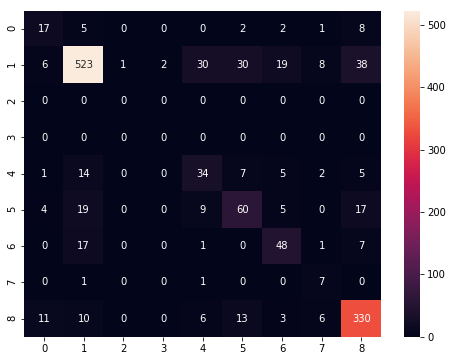

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
sbn.heatmap(rfc_confusion_matrix, annot=True, annot_kws={"size": 10}, fmt='g', ax=ax)

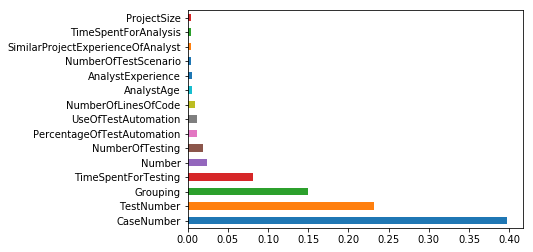

In [12]:
featImportances = pd.Series(data = rfc.feature_importances_,
                            index = EnvironmentalMetricsEncoded.iloc[:,:-1].columns)
featImportances.nlargest(15).plot(kind = 'barh')

## K-NN CLASSIFIER

In [13]:
knc = KNeighborsClassifier(n_neighbors=3,
                           weights='uniform',
                           algorithm='auto',
                           leaf_size=30,
                           p=1)
knc.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                     weights='uniform')

In [14]:
knc_confusion_matrix = confusion_matrix(y_test,knc.predict(X_test))
print(knc_confusion_matrix)
print("K-NN Train Accuracy:", accuracy_score(y_train, knc.predict(X_train)))
print("K-NN Test Accuracy:", accuracy_score(y_test, knc.predict(X_test)))
print("Precision - Recall - F1:", precision_recall_fscore_support(y_test, knc.predict(X_test), labels=np.unique(y_test), average='weighted')[:-1])

[[ 10  10   0   1   0   0  14]
 [  6 592  12  10   5   2  30]
 [  2  28  26   2   3   1   6]
 [  2  59   4  37   3   0   9]
 [  0  37   1   9  23   0   4]
 [  1   5   0   0   0   3   0]
 [ 15  39   2   5   3   0 315]]
K-NN Train Accuracy: 0.8904494382022472
K-NN Test Accuracy: 0.7529940119760479
Precision - Recall - F1: (0.7383029733282354, 0.7529940119760479, 0.7360392702294024)


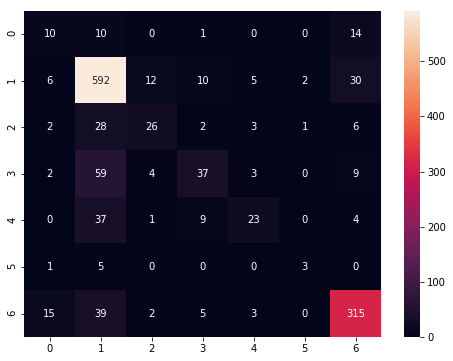

In [15]:
fig, ax = plt.subplots(figsize=(8,6))
sbn.heatmap(knc_confusion_matrix, annot=True, annot_kws={"size": 10}, fmt='g', ax=ax)

## XGBOOST CLASSIFIER

In [16]:
warnings.filterwarnings('ignore')

xgb = XGBClassifier(booster='gbtree',
                    gamma = 2,
                    max_depth = 18,
                    n_estimators = 2000,
                    silent=0,
                    learning_rate = 0.3,
                    subsample = 1.0,
                    colsample_bytree = 0.5,
                    min_child_weight = 5,
                    scale_pos_weight=200)

xgb.fit(X_train, 
        y_train,
        verbose=False,
        early_stopping_rounds=30, 
        eval_metric="mlogloss", 
        eval_set=[(X_train, y_train), (X_test, y_test)])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=2,
              learning_rate=0.3, max_delta_step=0, max_depth=18,
              min_child_weight=5, missing=None, n_estimators=2000, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=200, seed=None,
              silent=0, subsample=1.0, verbosity=1)

In [17]:
xgb_confusion_matrix = confusion_matrix(y_test, xgb.predict(X_test))
print(xgb_confusion_matrix)
print ("XGBoost Train Accuracy:", accuracy_score(y_train, xgb.predict(X_train)))
print ("XGboost Test Accuracy:", accuracy_score(y_test, xgb.predict(X_test)))
print("Precision - Recall - F1:", precision_recall_fscore_support(y_test, xgb.predict(X_test), labels=np.unique(y_test), average='weighted')[:-1])

[[  2  14   0   1   0   0  18]
 [  0 602   5  10   3   0  37]
 [  0  36  18   7   1   0   6]
 [  0  43   5  40   7   0  19]
 [  0  30   1   3  32   0   8]
 [  0   4   1   0   0   1   3]
 [  1  22   0   6   2   0 348]]
XGBoost Train Accuracy: 0.8601123595505618
XGboost Test Accuracy: 0.780688622754491
Precision - Recall - F1: (0.7641485141806766, 0.780688622754491, 0.7521952460640301)


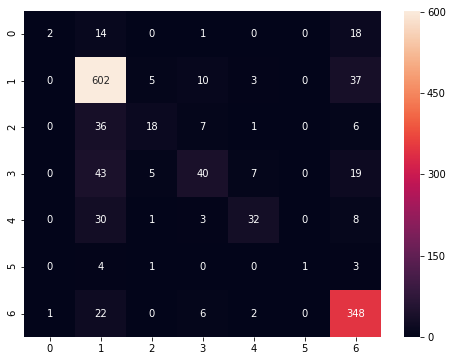

In [18]:
fig, ax = plt.subplots(figsize=(8,6))
sbn.heatmap(xgb_confusion_matrix, annot=True, annot_kws={"size": 10}, fmt='g', ax=ax)

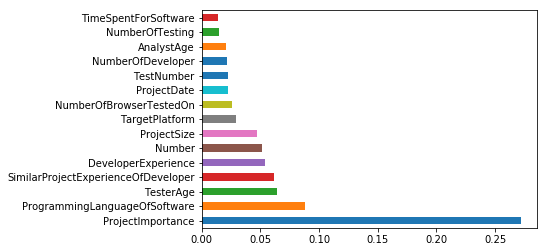

In [19]:
featImportances = pd.Series(data = xgb.feature_importances_,
                            index = EnvironmentalMetricsEncoded.iloc[:,:-1].columns)
featImportances.nlargest(15).plot(kind = 'barh')

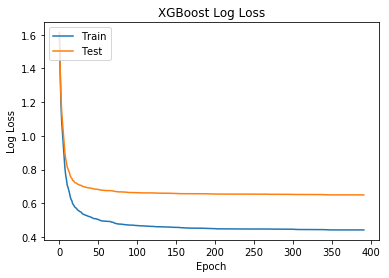

In [20]:
plt.plot(xgb.evals_result()['validation_0']['mlogloss'])
plt.plot(xgb.evals_result()['validation_1']['mlogloss'])
plt.title('XGBoost Log Loss')
plt.ylabel('Log Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## DEEP LEARNING

In [21]:
warnings.filterwarnings('ignore')

# Initialising the NN
model = Sequential()

# layers
model.add(Dense(36, kernel_initializer = 'uniform', activation = 'relu', input_dim = 36))
model.add(Dropout(0.1))

model.add(Dense(54, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(54, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(9, kernel_initializer = 'uniform', activation = 'softmax'))

# summary
model.summary()

W0429 15:15:42.863811 139794446726912 deprecation_wrapper.py:119] From /home/abdullahdeliogullari/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0429 15:15:42.884527 139794446726912 deprecation_wrapper.py:119] From /home/abdullahdeliogullari/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0429 15:15:42.889065 139794446726912 deprecation_wrapper.py:119] From /home/abdullahdeliogullari/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0429 15:15:42.915848 139794446726912 deprecation_wrapper.py:119] From /home/abdullahdeliogullari/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is d

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 36)                1332      
_________________________________________________________________
dropout_1 (Dropout)          (None, 36)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 54)                1998      
_________________________________________________________________
dropout_2 (Dropout)          (None, 54)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 54)                2970      
_________________________________________________________________
dropout_3 (Dropout)          (None, 54)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 9)                 495       
Total para

In [22]:
warnings.filterwarnings('ignore')
# Class Weights
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
# Early Stopping
earlyStoppingCallback = [EarlyStopping(monitor='val_loss', patience=20)]
# Compiling the NN
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# Train the NN
model.fit(X_train,
          y_train, 
          batch_size = 32, 
          class_weight=class_weights, 
          epochs = 400, 
          callbacks=earlyStoppingCallback, 
          validation_data=(X_test,y_test),
          verbose=0)

W0429 15:15:58.629214 139794446726912 deprecation_wrapper.py:119] From /home/abdullahdeliogullari/.local/lib/python3.5/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0429 15:15:58.662351 139794446726912 deprecation_wrapper.py:119] From /home/abdullahdeliogullari/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.

W0429 15:15:58.770998 139794446726912 deprecation.py:323] From /home/abdullahdeliogullari/.local/lib/python3.5/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


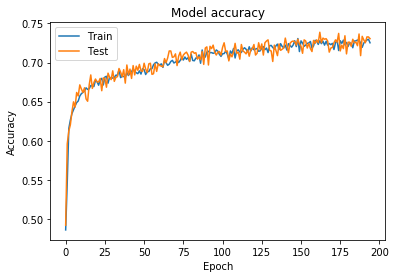

In [23]:
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [24]:
from sklearn.metrics import confusion_matrix
dl_confusion_matrix = confusion_matrix(y_test, np.argmax(model.predict(X_test),axis=1))
print(dl_confusion_matrix)
print ("Neural Train Accuracy:", accuracy_score(y_train, np.argmax(model.predict(X_train), axis=1)))
print ("Neural Test Accuracy:", accuracy_score(y_test, np.argmax(model.predict(X_test), axis=1)))

[[  0  16   0   0   0   0  19]
 [  0 602   2   5   3   0  45]
 [  0  49   4   5   0   0  10]
 [  0  60   0  30   4   0  20]
 [  0  37   1   3  25   0   8]
 [  0   5   0   0   0   0   4]
 [  0  60   0   3   1   0 315]]
Neural Train Accuracy: 0.7524344569288389
Neural Test Accuracy: 0.7305389221556886


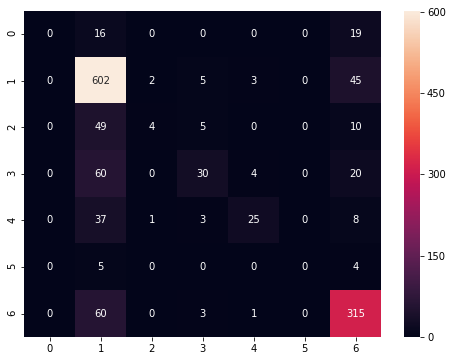

In [25]:
fig, ax = plt.subplots(figsize=(8,6))
sbn.heatmap(dl_confusion_matrix, annot=True, annot_kws={"size": 10}, fmt='g', ax=ax)

# BINARY CLASSIFICATION

## PREPROCESSING

In [26]:
BinaryEnvironmentalMetrics = EnvironmentalMetricsEncoded
BinaryEnvironmentalMetrics['ErrorCode'] = BinaryEnvironmentalMetrics['ErrorCode'].map({0:1, 1:1, 7:1, 2:0, 3:0, 4:0, 5:0, 6:0, 8:0})
BinaryEnvironmentalMetrics.head()

,Number,ProjectDate,ProjectSize,ProjectImportance,NumberOfDeveloper,NumberOfAnalyst,NumberOfTester,AnalystAge,AnalystExperience,SimilarProjectExperienceOfAnalyst,...,TimeSpentForTesting,UseOfTestAutomation,PercentageOfTestAutomation,NumberOfBrowserTestedOn,NumberOfTesting,NumberOfTestScenario,TestNumber,CaseNumber,Grouping,ErrorCode
0,0,0,1,0,0.0,0.0,0.0,1.0,0.8,0,...,0.0,0,0.333333,0.4,0.0,0.136808,0,0,5,0
1,0,0,1,0,0.0,0.0,0.0,1.0,0.8,0,...,0.0,0,0.333333,0.4,0.0,0.136808,0,1,28,1
2,0,0,1,0,0.0,0.0,0.0,1.0,0.8,0,...,0.0,0,0.333333,0.4,0.0,0.136808,0,2,5,0
3,0,0,1,0,0.0,0.0,0.0,1.0,0.8,0,...,0.0,0,0.333333,0.4,0.0,0.136808,0,3,17,1
4,0,0,1,0,0.0,0.0,0.0,1.0,0.8,0,...,0.0,0,0.333333,0.4,0.0,0.136808,0,4,22,1


In [27]:
X = EnvironmentalMetricsEncoded.iloc[:,:-1].values
y = EnvironmentalMetricsEncoded.iloc[:,-1].values

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## RANDOM FOREST CLASSIFIER

In [29]:
rfc = RandomForestClassifier(max_depth=13,
                             max_features=36,
                             n_estimators=100,
                             class_weight="balanced_subsample")
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='gini', max_depth=13, max_features=36,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [30]:
rfc_confusion_matrix = confusion_matrix(y_test, rfc.predict(X_test))
print(rfc_confusion_matrix)
print("Random Forest Train Accuracy:", accuracy_score(y_train, rfc.predict(X_train)))
print("Random Forest Test Accuracy:", accuracy_score(y_test, rfc.predict(X_test)))
print("Precision - Recall - F1:", precision_recall_fscore_support(y_test, rfc.predict(X_test), labels=np.unique(y_test), average='weighted')[:-1])

[[514  85]
 [103 634]]
Random Forest Train Accuracy: 0.9747191011235955
Random Forest Test Accuracy: 0.8592814371257484
Precision - Recall - F1: (0.8599378044482691, 0.8592814371257484, 0.8594531133655187)


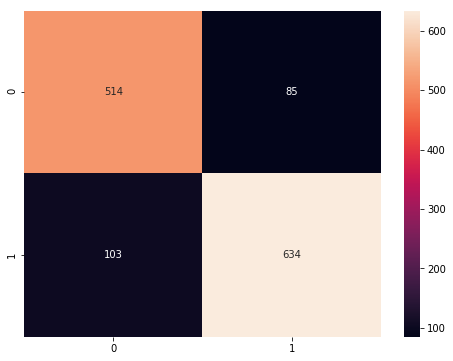

In [31]:
fig, ax = plt.subplots(figsize=(8,6))
sbn.heatmap(rfc_confusion_matrix, annot=True, annot_kws={"size": 10}, fmt='g', ax=ax)

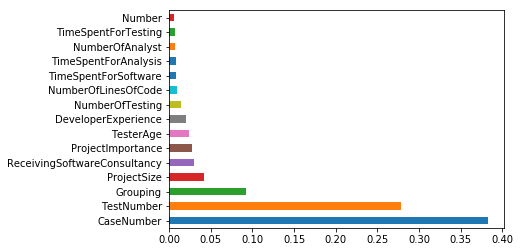

In [32]:
featImportances = pd.Series(data = rfc.feature_importances_,
                            index = EnvironmentalMetricsEncoded.iloc[:,:-1].columns)
featImportances.nlargest(15).plot(kind = 'barh')

## K-NN CLASSIFIER

In [33]:
knc = KNeighborsClassifier(n_neighbors=3,
                           weights='uniform',
                           algorithm='auto',
                           leaf_size=30,
                           p=1)
knc.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                     weights='uniform')

In [34]:
knc_confusion_matrix = confusion_matrix(y_test,knc.predict(X_test))
print(knc_confusion_matrix)
print("K-NN Train Accuracy:", accuracy_score(y_train, knc.predict(X_train)))
print("K-NN Test Accuracy:", accuracy_score(y_test, knc.predict(X_test)))
print("Precision - Recall - F1:", precision_recall_fscore_support(y_test, knc.predict(X_test), labels=np.unique(y_test), average='weighted')[:-1])

[[491 108]
 [122 615]]
K-NN Train Accuracy: 0.9318352059925094
K-NN Test Accuracy: 0.8278443113772455
Precision - Recall - F1: (0.8283645288873019, 0.8278443113772455, 0.8280132059223476)


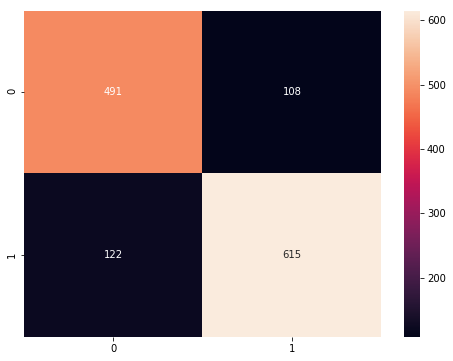

In [35]:
fig, ax = plt.subplots(figsize=(8,6))
sbn.heatmap(knc_confusion_matrix, annot=True, annot_kws={"size": 10}, fmt='g', ax=ax)

## XGBOOST CLASSIFIER

In [36]:
warnings.filterwarnings('ignore')

xgb = XGBClassifier(booster='gbtree',
                    gamma = 2,
                    max_depth = 18,
                    n_estimators = 2000,
                    silent=0,
                    learning_rate = 0.3,
                    subsample = 1.0,
                    colsample_bytree = 0.5,
                    min_child_weight = 5,
                    scale_pos_weight=200)

xgb.fit(X_train, 
        y_train,
        verbose=False,
        early_stopping_rounds=30, 
        eval_metric="error", 
        eval_set=[(X_train, y_train), (X_test, y_test)])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=2,
              learning_rate=0.3, max_delta_step=0, max_depth=18,
              min_child_weight=5, missing=None, n_estimators=2000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=200, seed=None,
              silent=0, subsample=1.0, verbosity=1)

In [37]:
xgb_confusion_matrix = confusion_matrix(y_test, xgb.predict(X_test))
print(xgb_confusion_matrix)
print ("XGBoost Train Accuracy:", accuracy_score(y_train, xgb.predict(X_train)))
print ("XGboost Test Accuracy:", accuracy_score(y_test, xgb.predict(X_test)))
print("Precision - Recall - F1:", precision_recall_fscore_support(y_test, xgb.predict(X_test), labels=np.unique(y_test), average='weighted')[:-1])

[[377 222]
 [ 23 714]]
XGBoost Train Accuracy: 0.8567415730337079
XGboost Test Accuracy: 0.8166167664670658
Precision - Recall - F1: (0.8433804026562259, 0.8166167664670658, 0.8092584040458166)


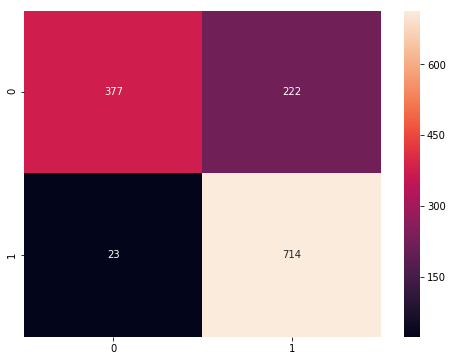

In [38]:
fig, ax = plt.subplots(figsize=(8,6))
sbn.heatmap(xgb_confusion_matrix, annot=True, annot_kws={"size": 10}, fmt='g', ax=ax)

## DEEP LEARNING

In [44]:
warnings.filterwarnings('ignore')

# Initialising the NN
model = Sequential()

# layers
model.add(Dense(36, kernel_initializer = 'uniform', activation = 'tanh', input_dim = 36))
model.add(Dropout(0.1))

model.add(Dense(54, kernel_initializer = 'uniform', activation = 'tanh'))
model.add(Dropout(0.1))

model.add(Dense(54, kernel_initializer = 'uniform', activation = 'tanh'))
model.add(Dropout(0.1))

model.add(Dense(54, kernel_initializer = 'uniform', activation = 'tanh'))
model.add(Dropout(0.1))

model.add(Dense(2, kernel_initializer = 'uniform', activation = 'sigmoid'))

# summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 36)                1332      
_________________________________________________________________
dropout_8 (Dropout)          (None, 36)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 54)                1998      
_________________________________________________________________
dropout_9 (Dropout)          (None, 54)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 54)                2970      
_________________________________________________________________
dropout_10 (Dropout)         (None, 54)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 54)                2970      
__________

In [45]:
warnings.filterwarnings('ignore')
# Early Stopping
earlyStoppingCallback = [EarlyStopping(monitor='val_loss', patience=20)]
# Compiling the NN
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# Train the NN
model.fit(X_train,
          y_train, 
          batch_size = 32, 
          epochs = 400, 
          callbacks=earlyStoppingCallback, 
          validation_data=(X_test,y_test),
          verbose=0)

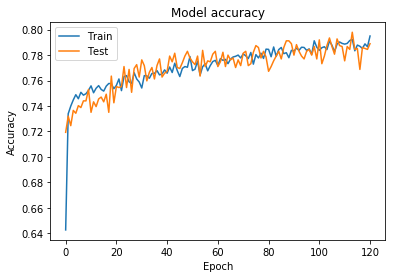

In [46]:
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [47]:
from sklearn.metrics import confusion_matrix
dl_confusion_matrix = confusion_matrix(y_test, np.argmax(model.predict(X_test),axis=1))
print(dl_confusion_matrix)
print ("Neural Train Accuracy:", accuracy_score(y_train, np.argmax(model.predict(X_train), axis=1)))
print ("Neural Test Accuracy:", accuracy_score(y_test, np.argmax(model.predict(X_test), axis=1)))

[[499 100]
 [182 555]]
Neural Train Accuracy: 0.798876404494382
Neural Test Accuracy: 0.7889221556886228


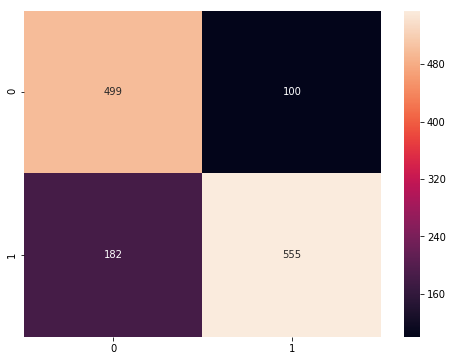

In [49]:
fig, ax = plt.subplots(figsize=(8,6))
sbn.heatmap(dl_confusion_matrix, annot=True, annot_kws={"size": 10}, fmt='g', ax=ax)